### 

### 서울시 범죄 데이터를 분석하여 구별로 범죄율을 시각화해서 나타내본다
- 목표 : 서울시 데이터를 구별로 검거율을 분석한 후, CCTV가 있을 경우와 없을 경우의 검거율이 관계가 있는지 분석하고자 한다.<br><br><br>
- 서울시 범죄 데이터
- CCTV 데이터
- 경찰서 위치 데이터

In [ ]:
!pip install koreanize-matplotlib 

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [31]:
# 서울시 경찰서별 범죄데이터 가져와보기
crime_data = pd.read_csv('02. crime_in_Seoul.csv',encoding='euc-kr')
crime_data.head() # 상위 5개 데이터만 출력

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [21]:
crime_data.info() # 각 컬럼의 자료형과 null 값 여부 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [22]:
crime_data.shape # 데이터 형태 확인하기

(31, 11)

In [23]:
crime_data.describe() # 각 컬럼의 통계값(평균, 표준편차, 최소값, 최대값 등) 확인하기

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,5.258065,4.935484,8.903226,8.161290,175.774194,131.967742
std,3.605253,3.203493,4.935280,5.710206,85.580259,56.590037
min,1.000000,0.000000,1.000000,1.000000,59.000000,46.000000
25%,3.000000,2.500000,6.000000,4.000000,103.500000,90.000000
50%,4.000000,4.000000,8.000000,7.000000,154.000000,124.000000
75%,7.500000,7.500000,13.000000,11.500000,251.000000,175.500000
max,14.000000,12.000000,22.000000,26.000000,334.000000,247.000000


In [33]:
# 경찰서 위치 가져오기
police_stations = pd.read_csv('03. seoul_police_stations.csv',encoding='utf-8')
police_stations.head(10)

,경찰서,주소,웹사이트
0,서울특별시경찰청,서울시 종로구 사직로8길 31,https://www.smpa.go.kr/
1,서울강남경찰서,서울시 강남구 테헤란로 114길 11,https://www.smpa.go.kr/gn/
2,서울강동경찰서,서울시 강동구 성내로 57,https://www.smpa.go.kr/gd/
3,서울강북경찰서,서울시 강북구 오패산로 406,https://www.smpa.go.kr/gb/
4,서울강서경찰서,서울시 강서구 화곡로 308,https://www.smpa.go.kr/gs/
5,서울관악경찰서,서울시 관악구 관악로5길 33,https://www.smpa.go.kr/ga/
6,서울광진경찰서,서울시 광진구 자양로 167,https://www.smpa.go.kr/gj/
7,서울구로경찰서,서울시 구로구 가마산로 235,https://www.smpa.go.kr/gr/
8,서울금천경찰서,서울시 금천구 시흥대로73길 50,https://www.smpa.go.kr/gc/
9,서울남대문경찰서,서울시 중구 한강대로 410,https://www.smpa.go.kr/ndm/


In [34]:
d_name = []
for temp in crime_data['관서명']:
    d_name.append('서울'+temp[0:-1]+'경찰서')    #서울중부서경찰서
    
crime_data['관서명'] = d_name

In [25]:
crime_data.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,서울중부경찰서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,서울종로경찰서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,서울남대문경찰서,1,0,6,4,65,46,"1,153",382,869,794
3,서울서대문경찰서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,서울혜화경찰서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [35]:
police_stations["주소"] = police_stations["주소"].apply(lambda x: x.split()[1])
police_stations.head()

,경찰서,주소,웹사이트
0,서울특별시경찰청,종로구,https://www.smpa.go.kr/
1,서울강남경찰서,강남구,https://www.smpa.go.kr/gn/
2,서울강동경찰서,강동구,https://www.smpa.go.kr/gd/
3,서울강북경찰서,강북구,https://www.smpa.go.kr/gb/
4,서울강서경찰서,강서구,https://www.smpa.go.kr/gs/


In [38]:
print("경찰서 개수", len(police_stations))
print("범죄 데이터 개수", len(crime_data))

경찰서 개수 32
범죄 데이터 개수 31


In [39]:
# 첫 번째 라인 삭제
police_stations = police_stations.iloc[1:]
police_stations.head()

,경찰서,주소,웹사이트
1,서울강남경찰서,강남구,https://www.smpa.go.kr/gn/
2,서울강동경찰서,강동구,https://www.smpa.go.kr/gd/
3,서울강북경찰서,강북구,https://www.smpa.go.kr/gb/
4,서울강서경찰서,강서구,https://www.smpa.go.kr/gs/
5,서울관악경찰서,관악구,https://www.smpa.go.kr/ga/


In [40]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [43]:
crime_data['절도 발생'] = crime_data['절도 발생'].replace(',', '', regex=True)
crime_data['절도 검거'] = crime_data['절도 검거'].replace(',', '', regex=True)
crime_data['폭력 발생'] = crime_data['폭력 발생'].replace(',', '', regex=True)
crime_data['폭력 검거'] = crime_data['폭력 검거'].replace(',', '', regex=True)
crime_data.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,서울중부경찰서,2,2,3,2,105,65,1395,477,1355,1170
1,서울종로경찰서,3,3,6,5,115,98,1070,413,1278,1070
2,서울남대문경찰서,1,0,6,4,65,46,1153,382,869,794
3,서울서대문경찰서,2,2,5,4,154,124,1812,738,2056,1711
4,서울혜화경찰서,3,2,5,4,96,63,1114,424,1015,861


In [42]:
crime_data['절도 발생'] = crime_data['절도 발생'].astype('int')
crime_data['절도 검거'] = crime_data['절도 검거'].astype('int')
crime_data['폭력 발생'] = crime_data['폭력 발생'].astype('int')
crime_data['폭력 검거'] = crime_data['폭력 검거'].astype('int')
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [51]:
# 경찰서별로 정렬해보기
crime_data_sorted = crime_data.sort_values(by='관서명')
crime_data_sorted.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
17,서울강남경찰서,3,3,15,12,300,225,2411,984,2465,2146
20,서울강동경찰서,4,3,6,8,156,123,2366,789,2712,2248
14,서울강북경찰서,7,8,14,13,153,126,1434,618,2649,2348
19,서울강서경찰서,7,8,13,13,262,191,2096,1260,3207,2718
18,서울관악경찰서,9,8,12,14,320,221,2706,827,3298,2642


In [52]:
crime_data_sorted["관서명"] = police_stations["주소"]
crime_data_sorted.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
17,은평구,3,3,15,12,300,225,2411,984,2465,2146
20,성북구,4,3,6,8,156,123,2366,789,2712,2248
14,마포구,7,8,14,13,153,126,1434,618,2649,2348
19,성동구,7,8,13,13,262,191,2096,1260,3207,2718
18,서초구,9,8,12,14,320,221,2706,827,3298,2642


In [54]:
crime_data_sorted.rename(columns={"관서명":"구명"}, inplace = True)
crime_data_sorted.head()

,구명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
17,은평구,3,3,15,12,300,225,2411,984,2465,2146
20,성북구,4,3,6,8,156,123,2366,789,2712,2248
14,마포구,7,8,14,13,153,126,1434,618,2649,2348
19,성동구,7,8,13,13,262,191,2096,1260,3207,2718
18,서초구,9,8,12,14,320,221,2706,827,3298,2642


In [55]:
crime_result = pd.pivot_table(crime_data_sorted, index='구명',aggfunc=np.sum)
crime_result.rename(columns={'강간 발생':'강간','강도 발생':'강도','살인 발생':'살인','절도 발생':'절도','폭력 발생':'폭력'},inplace=True)
crime_result

C:\Users\ms211\AppData\Local\Temp\ipykernel_30836\2132912271.py:1: FutureWarning: The provided callable <function sum at 0x0000022D9A00BA60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_result = pd.pivot_table(crime_data_sorted, index='구명',aggfunc=np.sum)


,강간 검거,강간,강도 검거,강도,살인 검거,살인,절도 검거,절도,폭력 검거,폭력
구명,,,,,,,,,,
강남구,262,396,16,21,9,11,1302,3405,3502,4285
강동구,46,65,4,6,0,1,382,1153,794,869
강북구,124,154,4,5,2,2,738,1812,1711,2056
강서구,63,96,4,5,2,3,424,1114,861,1015
관악구,173,194,14,14,5,5,587,1557,1704,2050
광진구,71,86,1,2,2,2,409,953,1015,1194
구로구,146,173,13,13,5,5,814,1981,2227,2548
금천구,247,294,10,14,8,8,813,2555,2519,2983
노원구,119,126,8,9,4,4,597,1607,1395,1612


In [56]:
crime_result['강간검거율'] = crime_result['강간 검거']/crime_result['강간']*100
crime_result['강도검거율'] = crime_result['강도 검거']/crime_result['강도']*100
crime_result['살인검거율'] = crime_result['살인 검거']/crime_result['살인']*100
crime_result['절도검거율'] = crime_result['절도 검거']/crime_result['절도']*100
crime_result['폭력검거율'] = crime_result['폭력 검거']/crime_result['폭력']*100
crime_result

,강간 검거,강간,강도 검거,강도,살인 검거,살인,절도 검거,절도,폭력 검거,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구명,,,,,,,,,,,,,,,
강남구,262,396,16,21,9,11,1302,3405,3502,4285,66.161616,76.190476,81.818182,38.237885,81.726954
강동구,46,65,4,6,0,1,382,1153,794,869,70.769231,66.666667,0.000000,33.130963,91.369390
강북구,124,154,4,5,2,2,738,1812,1711,2056,80.519481,80.000000,100.000000,40.728477,83.219844
강서구,63,96,4,5,2,3,424,1114,861,1015,65.625000,80.000000,66.666667,38.061041,84.827586
관악구,173,194,14,14,5,5,587,1557,1704,2050,89.175258,100.000000,100.000000,37.700706,83.121951
광진구,71,86,1,2,2,2,409,953,1015,1194,82.558140,50.000000,100.000000,42.917104,85.008375
구로구,146,173,13,13,5,5,814,1981,2227,2548,84.393064,100.000000,100.000000,41.090358,87.401884
금천구,247,294,10,14,8,8,813,2555,2519,2983,84.013605,71.428571,100.000000,31.819961,84.445189
노원구,119,126,8,9,4,4,597,1607,1395,1612,94.444444,88.888889,100.000000,37.149969,86.538462


In [58]:
col_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

for temp in col_list:
    crime_result.loc[crime_result[temp] > 100, temp] = 100
crime_result

,강간 검거,강간,강도 검거,강도,살인 검거,살인,절도 검거,절도,폭력 검거,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구명,,,,,,,,,,,,,,,
강남구,262,396,16,21,9,11,1302,3405,3502,4285,66.161616,76.190476,81.818182,38.237885,81.726954
강동구,46,65,4,6,0,1,382,1153,794,869,70.769231,66.666667,0.000000,33.130963,91.369390
강북구,124,154,4,5,2,2,738,1812,1711,2056,80.519481,80.000000,100.000000,40.728477,83.219844
강서구,63,96,4,5,2,3,424,1114,861,1015,65.625000,80.000000,66.666667,38.061041,84.827586
관악구,173,194,14,14,5,5,587,1557,1704,2050,89.175258,100.000000,100.000000,37.700706,83.121951
광진구,71,86,1,2,2,2,409,953,1015,1194,82.558140,50.000000,100.000000,42.917104,85.008375
구로구,146,173,13,13,5,5,814,1981,2227,2548,84.393064,100.000000,100.000000,41.090358,87.401884
금천구,247,294,10,14,8,8,813,2555,2519,2983,84.013605,71.428571,100.000000,31.819961,84.445189
노원구,119,126,8,9,4,4,597,1607,1395,1612,94.444444,88.888889,100.000000,37.149969,86.538462


<Axes: xlabel='구명'>

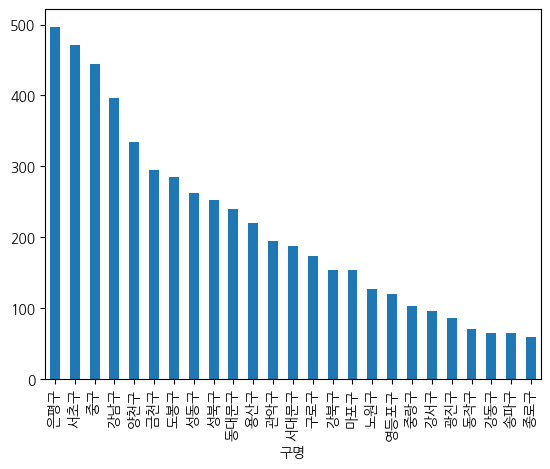

In [73]:
crime_result['강간'].sort_values(ascending=False).plot.bar()

<Axes: xlabel='구명'>

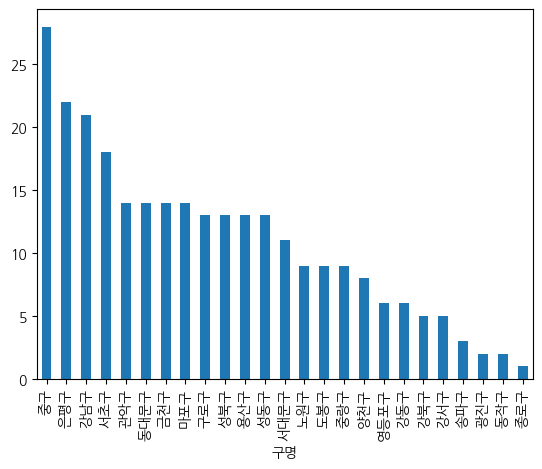

In [74]:
crime_result['강도'].sort_values(ascending=False).plot.bar()

<Axes: xlabel='구명'>

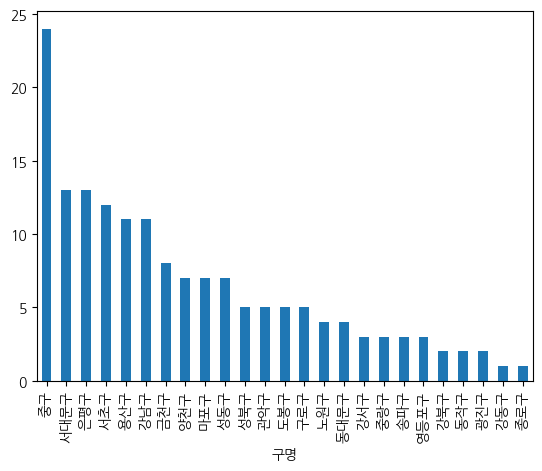

In [75]:
crime_result['살인'].sort_values(ascending=False).plot.bar()

<Axes: xlabel='구명'>

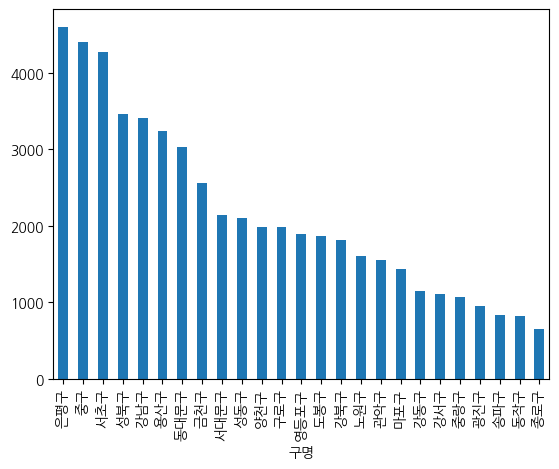

In [78]:
crime_result['절도'].sort_values(ascending=False).plot.bar()

<Axes: xlabel='구명'>

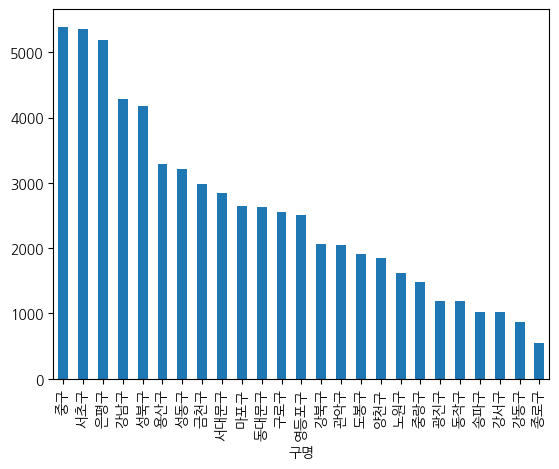

In [77]:
crime_result['폭력'].sort_values(ascending=False).plot.bar()

In [65]:
cctv_data = pd.read_csv('01. CCTV_result.csv')
cctv_data.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [66]:
cctv_data.set_index('구별',inplace=True)
cctv_data

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.189970,425.290264
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.348536,329.592918
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911,35.989293
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.222170,125.483618


In [67]:
crime_result['cctv'] = cctv_data['소계']
crime_result

,강간 검거,강간,강도 검거,강도,살인 검거,살인,절도 검거,절도,폭력 검거,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,cctv
구명,,,,,,,,,,,,,,,,
강남구,262,396,16,21,9,11,1302,3405,3502,4285,66.161616,76.190476,81.818182,38.237885,81.726954,2780
강동구,46,65,4,6,0,1,382,1153,794,869,70.769231,66.666667,0.000000,33.130963,91.369390,773
강북구,124,154,4,5,2,2,738,1812,1711,2056,80.519481,80.000000,100.000000,40.728477,83.219844,748
강서구,63,96,4,5,2,3,424,1114,861,1015,65.625000,80.000000,66.666667,38.061041,84.827586,884
관악구,173,194,14,14,5,5,587,1557,1704,2050,89.175258,100.000000,100.000000,37.700706,83.121951,1496
광진구,71,86,1,2,2,2,409,953,1015,1194,82.558140,50.000000,100.000000,42.917104,85.008375,707
구로구,146,173,13,13,5,5,814,1981,2227,2548,84.393064,100.000000,100.000000,41.090358,87.401884,1561
금천구,247,294,10,14,8,8,813,2555,2519,2983,84.013605,71.428571,100.000000,31.819961,84.445189,1015
노원구,119,126,8,9,4,4,597,1607,1395,1612,94.444444,88.888889,100.000000,37.149969,86.538462,1265


In [68]:
crime_result['범죄'] = crime_result['강간']+crime_result['강도']+crime_result['절도']+crime_result['폭력']+crime_result['살인']
crime_result

,강간 검거,강간,강도 검거,강도,살인 검거,살인,절도 검거,절도,폭력 검거,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,cctv,범죄
구명,,,,,,,,,,,,,,,,,
강남구,262,396,16,21,9,11,1302,3405,3502,4285,66.161616,76.190476,81.818182,38.237885,81.726954,2780,8118
강동구,46,65,4,6,0,1,382,1153,794,869,70.769231,66.666667,0.000000,33.130963,91.369390,773,2094
강북구,124,154,4,5,2,2,738,1812,1711,2056,80.519481,80.000000,100.000000,40.728477,83.219844,748,4029
강서구,63,96,4,5,2,3,424,1114,861,1015,65.625000,80.000000,66.666667,38.061041,84.827586,884,2233
관악구,173,194,14,14,5,5,587,1557,1704,2050,89.175258,100.000000,100.000000,37.700706,83.121951,1496,3820
광진구,71,86,1,2,2,2,409,953,1015,1194,82.558140,50.000000,100.000000,42.917104,85.008375,707,2237
구로구,146,173,13,13,5,5,814,1981,2227,2548,84.393064,100.000000,100.000000,41.090358,87.401884,1561,4720
금천구,247,294,10,14,8,8,813,2555,2519,2983,84.013605,71.428571,100.000000,31.819961,84.445189,1015,5854
노원구,119,126,8,9,4,4,597,1607,1395,1612,94.444444,88.888889,100.000000,37.149969,86.538462,1265,3358


<Axes: xlabel='구명'>

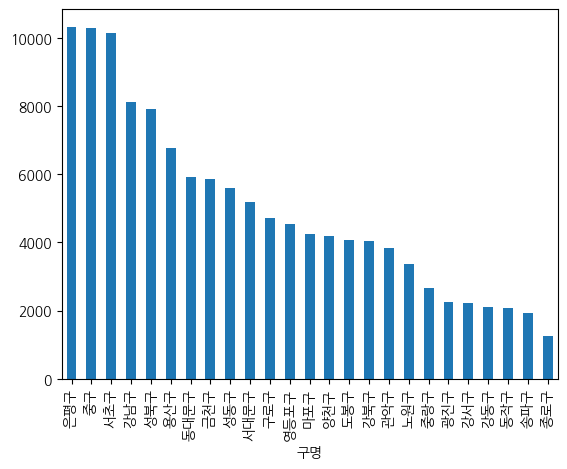

In [79]:
crime_result['범죄'].sort_values(ascending=False).plot.bar()

In [80]:
crime_corr_result = crime_result[['cctv','강도검거율','폭력검거율']]
crime_corr_result.corr()

,cctv,강도검거율,폭력검거율
cctv,1.000000,0.109726,-0.197653
강도검거율,0.109726,1.000000,0.054578
폭력검거율,-0.197653,0.054578,1.000000
